# Running the models 

In [85]:
# Import necessary libraries
import json
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix
import pandas as pd
import logging
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


## Load data 

In [86]:
merged_df = pd.read_csv('/Users/dionnespaltman/Desktop/V3/merged_df.csv', sep=',')

merged_df.drop('Unnamed: 0', axis=1, inplace=True)
merged_df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [87]:
# Count the number of instances of people in VVR_group = 1 and VVR_group = 0
count_vvr_group = merged_df['VVR_group'].value_counts()

# Print the counts
print("Number of instances in VVR_group = 1:", count_vvr_group[1])
print("Number of instances in VVR_group = 0:", count_vvr_group[0])


Number of instances in VVR_group = 1: 26
Number of instances in VVR_group = 0: 85


In [88]:
display(merged_df.head(5))

ID  sum_12  sum_4567  sum_456  VVR_group  Condition  VVR_1  VVR_2  \
0  23    24.0      37.0     27.0          0          2   13.0   11.0   
1  24    23.0      37.0     28.0          0          2   12.0   11.0   
2  25    28.0      44.0     33.0          1          2   16.0   12.0   
3  26    30.0      37.0     29.0          0          1   15.0   15.0   
4  27    22.0      39.0     31.0          1          2   11.0   11.0   

   AU01_r__sum_values  AU01_r__variance  ...  AU26_r__minimum  AU26_r__mean  \
0             4982.48          0.425041  ...             0.00      0.633284   
1             9390.23          0.448366  ...             0.00      1.484701   
2             6954.35          0.599805  ...             0.00      0.862301   
3             9707.43          0.873280  ...             0.00      0.552359   
4            21049.90          1.475421  ...            -3.92      0.142027   

   AU26_r__mean_abs_change  AU45_r__sum_values  AU45_r__variance  \
0                 0.076328             9231.74          0.825039   
1                 0.125851            11887.00          0.634554   
2                 0.101969             9020.78          0.750701   
3                 0.069582             6585.31          0.609348   
4                 0.386527            23027.73          1.160635   

   AU45_r__standard_deviation  AU45_r__maximum  AU45_r__minimum  AU45_r__mean  \
0                    0.908316             4.91             0.00      0.627753   
1                    0.796589             5.00             0.00      0.436942   
2                    0.866430             4.04             0.00      0.550652   
3                    0.780607             4.90             0.00      0.371673   
4                    1.077328             5.04            -4.29      1.094318   

   AU45_r__mean_abs_change  
0                 0.133624  
1                 0.098134  
2                 0.085720  
3                 0.056287  
4                 0.231853  

[5 rows x 127 columns]

In [114]:
with open('/Users/dionnespaltman/Desktop/V3/columns_action_units.json', 'r') as f:
    columns_action_units = json.load(f)

print(len(columns_action_units))
print(columns_action_units)

119
['AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__minimum', 'AU01_r__mean', 'AU01_r__mean_abs_change', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__minimum', 'AU02_r__mean', 'AU02_r__mean_abs_change', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__minimum', 'AU04_r__mean', 'AU04_r__mean_abs_change', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__minimum', 'AU05_r__mean', 'AU05_r__mean_abs_change', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__minimum', 'AU06_r__mean', 'AU06_r__mean_abs_change', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__minimum', 'AU07_r__mean', 'AU07_r__mean_abs_change', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09

## Scatterplot 

In [63]:
# import statements 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
# Count the number of instances of people in VVR_group = 1 and VVR_group = 0
count_vvr_group = merged_df['VVR_group'].value_counts()

# Print the counts
print("Number of instances in VVR_group = 1:", count_vvr_group[1])
print("Number of instances in VVR_group = 0:", count_vvr_group[0])


Number of instances in VVR_group = 1: 26
Number of instances in VVR_group = 0: 85


In [65]:
columns_names_x = merged_df.columns
print(columns_names_x)

Index(['ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition',
       'VVR_1', 'VVR_2', 'AU01_r__sum_values', 'AU01_r__variance',
       ...
       'AU26_r__minimum', 'AU26_r__mean', 'AU26_r__mean_abs_change',
       'AU45_r__sum_values', 'AU45_r__variance', 'AU45_r__standard_deviation',
       'AU45_r__maximum', 'AU45_r__minimum', 'AU45_r__mean',
       'AU45_r__mean_abs_change'],
      dtype='object', length=127)


In [67]:
# Extract features and target variable
columns_to_drop = [ 'ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition', 'VVR_1', 'VVR_2'] 
# X = merged_df.drop(columns_to_drop, axis=1)
# y = merged_df['VVR_group']

X = merged_df.drop(columns_to_drop, axis=1)
y = merged_df['VVR_group']

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

print(len(X))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

Original dataset shape Counter({0: 85, 1: 26})
Resampled dataset shape Counter({0: 85, 1: 85})
111


In [76]:
# Count the number of NaN values in each column of the DataFrame
nan_counts = y_res.isna().sum()

# Print columns with NaN values
nan_columns = nan_counts[nan_counts > 0]
print("Columns with NaN values:")
print(nan_columns)


Columns with NaN values:
[]


In [77]:
# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components (2 for 2D scatter plot)
X_pca = pca.fit_transform(X_scaled)

In [78]:
print(len(columns_action_units))
print(columns_action_units)

119
['AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__minimum', 'AU01_r__mean', 'AU01_r__mean_abs_change', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__minimum', 'AU02_r__mean', 'AU02_r__mean_abs_change', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__minimum', 'AU04_r__mean', 'AU04_r__mean_abs_change', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__minimum', 'AU05_r__mean', 'AU05_r__mean_abs_change', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__minimum', 'AU06_r__mean', 'AU06_r__mean_abs_change', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__minimum', 'AU07_r__mean', 'AU07_r__mean_abs_change', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09

In [79]:
print(X_pca.shape)

# display(X_pca)


(170, 2)


In [80]:
# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

display(pca_df)

PC1        PC2
0     0.152186   0.414424
1     2.072262  -5.480963
2    -0.232614   0.186988
3    -2.009491   2.570176
4    37.461036  17.269162
..         ...        ...
165   0.879969  -3.830848
166  -3.262589   9.101354
167   1.179194  -3.780990
168  -3.376890  -1.055281
169   2.400687  -1.501501

[170 rows x 2 columns]

In [82]:
# Concatenate the principal components with the target variable
final_df = pd.concat([pca_df, y_res], axis=1)

display(final_df)

PC1        PC2  VVR_group
0     0.152186   0.414424          0
1     2.072262  -5.480963          0
2    -0.232614   0.186988          1
3    -2.009491   2.570176          0
4    37.461036  17.269162          1
..         ...        ...        ...
165   0.879969  -3.830848          1
166  -3.262589   9.101354          1
167   1.179194  -3.780990          1
168  -3.376890  -1.055281          1
169   2.400687  -1.501501          1

[170 rows x 3 columns]

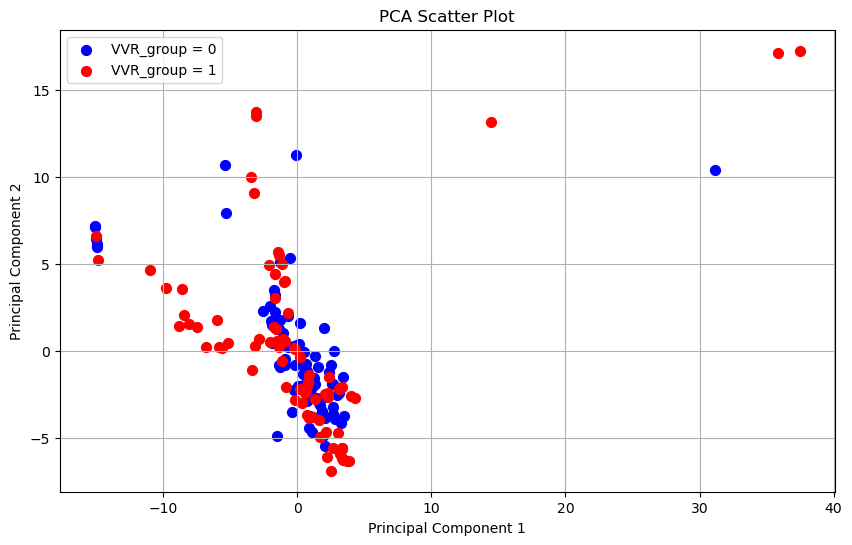

In [83]:
# Plot the data
plt.figure(figsize=(10, 6))
targets = [0, 1]  # VVR_group labels
colors = ['b', 'r']  # Blue for VVR_group = 0, Red for VVR_group = 1
for target, color in zip(targets, colors):
    indices_to_keep = final_df['VVR_group'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'PC1'],
                final_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(['VVR_group = 0', 'VVR_group = 1'])
plt.grid(True)
plt.show()

## SMOTE 

In [60]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [61]:
X = merged_df.drop(columns_to_drop, axis=1)
y = merged_df['VVR_group']

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 85, 1: 26})
Resampled dataset shape Counter({0: 85, 1: 85})


In [59]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE

# X, y = make_classification(n_classes=2, class_sep=2,
# weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
# n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
# print('Original dataset shape %s' % Counter(y))
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)
# print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


## Train test split & SMOTE
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/ 

In [100]:
train, test = train_test_split(merged_df, test_size=0.2, random_state=123)
train, val = train_test_split(train, stratify=train['VVR_group'], random_state=123)

# train.drop('Unnamed: 0', axis=1, inplace=True)
# test.drop('Unnamed: 0', axis=1, inplace=True)
# val.drop('Unnamed: 0', axis=1, inplace=True)

In [101]:
print(train.shape)
display(train.head(5))

(66, 127)


ID  sum_12  sum_4567  sum_456  VVR_group  Condition  VVR_1  VVR_2  \
61   88    18.0      32.0     24.0          0          1    9.0    9.0   
89  121    25.0      47.0     37.0          1          2   12.0   13.0   
64   93    16.0      32.0     24.0          0          1    8.0    8.0   
45   71    25.0      33.0     24.0          0          1   14.0   11.0   
16   39    20.0      34.0     26.0          0          1   11.0    9.0   

    AU01_r__sum_values  AU01_r__variance  ...  AU26_r__minimum  AU26_r__mean  \
61            10296.62          0.732615  ...              0.0      0.815700   
89             8417.03          0.386621  ...              0.0      0.496452   
64             5385.21          0.190537  ...              0.0      0.798643   
45            17332.81          0.832777  ...              0.0      0.860467   
16             9204.82          0.987519  ...              0.0      1.190539   

    AU26_r__mean_abs_change  AU45_r__sum_values  AU45_r__variance  \
61                 0.083855            11934.82          0.882494   
89                 0.056181             5811.91          0.133940   
64                 0.138848            13323.30          0.856142   
45                 0.093140            14039.45          0.535330   
16                 0.102411            11287.74          1.080609   

    AU45_r__standard_deviation  AU45_r__maximum  AU45_r__minimum  \
61                    0.939412             4.95              0.0   
89                    0.365978             2.64              0.0   
64                    0.925279             4.19              0.0   
45                    0.731662             4.34              0.0   
16                    1.039524             5.00              0.0   

    AU45_r__mean  AU45_r__mean_abs_change  
61      0.559296                 0.088857  
89      0.210112                 0.032116  
64      0.547428                 0.075234  
45      0.463134                 0.071848  
16      0.640948                 0.100654  

[5 rows x 127 columns]

In [102]:
print(test.shape)
display(test.head(5))

(23, 127)


ID  sum_12  sum_4567  sum_456  VVR_group  Condition  VVR_1  VVR_2  \
94   127    25.0      40.0     29.0          0          3   15.0   10.0   
106  142    20.0      34.0     26.0          0          3   11.0    9.0   
42    67    16.0      32.0     24.0          0          1    8.0    8.0   
81   113    21.0      38.0     28.0          0          3   11.0   10.0   
108  144    24.0      35.0     27.0          0          3   12.0   12.0   

     AU01_r__sum_values  AU01_r__variance  ...  AU26_r__minimum  AU26_r__mean  \
94          13911.57000          0.930787  ...         0.000000      0.779323   
106         11750.48000          0.739290  ...         0.000000      0.448007   
42           7844.71717          0.000000  ...         0.743851      0.743851   
81              0.00000          0.000000  ...         0.000000      1.338750   
108          7175.00000          0.461053  ...         0.000000      0.551210   

     AU26_r__mean_abs_change  AU45_r__sum_values  AU45_r__variance  \
94                  0.088858        10158.120000          0.525558   
106                 0.076771        10547.030000          0.506052   
42                  0.000000        10377.048717          0.000000   
81                  0.567143            3.860000          0.295919   
108                 0.075307         7319.310000          0.418456   

     AU45_r__standard_deviation  AU45_r__maximum  AU45_r__minimum  \
94                     0.724954         4.040000         0.000000   
106                    0.711374         3.530000         0.000000   
42                     0.000000         0.512169         0.512169   
81                     0.543984         1.320000         0.000000   
108                    0.646882         3.780000         0.000000   

     AU45_r__mean  AU45_r__mean_abs_change  
94       0.441063                 0.057725  
106      0.457691                 0.055759  
42       0.512169                 0.000000  
81       0.482500                 0.200000  
108      0.391344                 0.072455  

[5 rows x 127 columns]

In [103]:
print(val.shape)
display(val.head(5))

(22, 127)


ID  sum_12  sum_4567  sum_456  VVR_group  Condition  VVR_1  VVR_2  \
32   57    24.0      38.0     28.0          0          2   13.0   11.0   
98  132    21.0      35.0     27.0          0          3   10.0   11.0   
62   91    21.0      35.0     27.0          0          2   11.0   10.0   
65   94    19.0      34.0     25.0          0          3   10.0    9.0   
73  102    31.0      52.0     42.0          1          1   17.0   14.0   

    AU01_r__sum_values  AU01_r__variance  ...  AU26_r__minimum  AU26_r__mean  \
32            12516.80          0.540121  ...              0.0      0.981026   
98             7056.68          0.334938  ...              0.0      0.792035   
62             6520.46          0.467207  ...              0.0      0.662128   
65             9445.82          0.970692  ...              0.0      0.725284   
73             6050.79          0.288026  ...              0.0      0.314870   

    AU26_r__mean_abs_change  AU45_r__sum_values  AU45_r__variance  \
32                 0.090373            18179.95          1.253354   
98                 0.090189             8683.05          0.402135   
62                 0.069108             8142.39          0.722803   
65                 0.101624             8031.51          0.798583   
73                 0.050167            16885.76          1.121810   

    AU45_r__standard_deviation  AU45_r__maximum  AU45_r__minimum  \
32                    1.119533             4.92              0.0   
98                    0.634141             4.53              0.0   
62                    0.850178             4.81              0.0   
65                    0.893634             4.82              0.0   
73                    1.059156             4.32              0.0   

    AU45_r__mean  AU45_r__mean_abs_change  
32      0.737164                 0.078196  
98      0.392241                 0.070557  
62      0.445158                 0.071289  
65      0.522477                 0.073509  
73      0.668214                 0.078689  

[5 rows x 127 columns]

## Define featurizer 

In [116]:
# Adding VVR stage 1 and 2 to the featurizers
# columns_action_units.append('VVR_1')
# columns_action_units.append('VVR_2')
# print(columns_action_units)

featurizer = ColumnTransformer(transformers=[("numeric", StandardScaler(), columns_action_units)], remainder='drop')

print(featurizer)

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 ['AU01_r__sum_values', 'AU01_r__variance',
                                  'AU01_r__standard_deviation',
                                  'AU01_r__maximum', 'AU01_r__minimum',
                                  'AU01_r__mean', 'AU01_r__mean_abs_change',
                                  'AU02_r__sum_values', 'AU02_r__variance',
                                  'AU02_r__standard_deviation',
                                  'AU02_r__maximum', 'AU02_r__minimum',
                                  'AU02_r__mean', 'AU02_r__mean_abs_change',
                                  'AU04_r__sum_values', 'AU04_r__variance',
                                  'AU04_r__standard_deviation',
                                  'AU04_r__maximum', 'AU04_r__minimum',
                                  'AU04_r__mean', 'AU04_r__mean_abs_change',
                                  'AU05_r__sum_values', 'AU05_r__varian

## Define models  

In [117]:
dummy = make_pipeline(featurizer, DummyClassifier(strategy='most_frequent'))
rf = make_pipeline(featurizer, RandomForestClassifier())
svm = make_pipeline(featurizer, SVC())
multiclass_svm = make_pipeline(featurizer, SVC(decision_function_shape='ovr'))
xgb = make_pipeline(featurizer, XGBClassifier())
mlp = make_pipeline(featurizer, MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))

models = {
    "Dummy": dummy,
    "RandomForest": rf,
    "SVM": svm,
    "Multiclass SVM": multiclass_svm,
    "XGBoost": xgb,
    "MLP": mlp
}

## Evaluate 

In [36]:
# def evaluate_model(model, X, y):
#     """
#     Evaluate the model's performance
#     """
#     model.fit(X, y)
#     y_probs = model.predict_proba(X)[:, 1]
#     precision = precision_score(y, model.predict(X))
#     recall = recall_score(y, model.predict(X))
#     f1 = f1_score(y, model.predict(X))
#     precision_curve, recall_curve, _ = precision_recall_curve(y, y_probs)
#     auc_pr = auc(recall_curve, precision_curve)
#     cm = confusion_matrix(y, model.predict(X))
    
#     logging.info(f"Precision: {precision}")
#     logging.info(f"Recall: {recall}")
#     logging.info(f"F1-score: {f1}")
#     logging.info(f"AUC-PR score: {auc_pr}")
#     logging.info(f"Confusion Matrix:")
#     logging.info(cm)

## Main

In [118]:
# Set logging level to INFO
logging.getLogger().setLevel(logging.INFO)

# merged_df = load_data()
# train, val, test = split_data(merged_df)
# columns_action_units = load_columns()
# featurizer = define_featurizer(columns_action_units)
# models = define_models(featurizer)

# logging.info("Applying SMOTE to handle class imbalance")
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(train.drop('VVR_group', axis=1), train['VVR_group'].values)
# logging.info("X_res, y_res:", X_res.shape, y_res.shape)
# train_resampled = pd.DataFrame(X_res, columns=train.drop('VVR_group', axis=1).columns)
# train_resampled['VVR_group'] = y_res

logging.info("Fitting models")

for name, model in models.items():
    model.fit(train.drop('VVR_group', axis=1), train['VVR_group'].values)
    logging.info(f"Evaluating {name} on validation data")
    pred = model.predict(val.drop('VVR_group', axis=1))
    accuracy = accuracy_score(val['VVR_group'].values, pred)
    report = classification_report(val['VVR_group'].values, pred)
    cm = confusion_matrix(val['VVR_group'].values, pred)
    
    logging.info(f"{name} Accuracy: {accuracy}")
    logging.info(f"{name} Classification Report:")
    logging.info(report)
    logging.info(f"{name} Confusion Matrix:")
    logging.info(cm)

best_model_name = max(models, key=lambda x: accuracy_score(val['VVR_group'].values, models[x].predict(val.drop('VVR_group', axis=1))))
best_model = models[best_model_name]

logging.info(f"Predicting on test using best model: {best_model_name}")

pred = best_model.predict(test.drop('VVR_group', axis=1))

accuracy = accuracy_score(test['VVR_group'].values, pred)
report = classification_report(test['VVR_group'].values, pred)
cm = confusion_matrix(test['VVR_group'].values, pred)

logging.info(f"{best_model_name} Accuracy on Test Data: {accuracy}")
logging.info(f"{best_model_name} Classification Report on Test Data:")
logging.info(report)
logging.info(f"{best_model_name} Confusion Matrix:")
logging.info(cm)

# 

INFO:root:Fitting models
INFO:root:Evaluating Dummy on validation data
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

## ... 

## ... 